In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import seaborn as sns

In [2]:
df = pd.read_csv('flipkartphani.csv')

In [3]:
df.shape

(560, 12)

In [4]:
df.head()

,Unnamed: 0,Rating,star_rating,ton,Watt,offer_price,original_price,disco,warrenty,wifi_facility,noiselevel,Brand
0,0,4.4,5 Star,1.5,1360.00,29990.0,57000.0,['47%'],1 Year on Product and 5 Years on Compressor,Yes,44.0,MarQ
1,1,4.2,3 Star,2.0,2050.00,31990.0,42999.0,['25%'],1 Year on Product and 5 Years on Compressor,No,44.0,MarQ
2,2,4.1,3 Star,1.5,1790.00,27999.0,44990.0,['37%'],1 Year Warranty on Product and 10 Years on Com...,No,45.0,TCL
3,3,4.3,5 Star,1.5,818.81,44990.0,66990.0,['32%'],"1 Year on Product, 1 Year on Condenser and 10 ...",No,31.0,LG
4,4,4.6,5 Star,1.0,571.99,34999.0,52990.0,['33%'],"1 Year Warranty on Product, 5 Years on PCB and...",No,21.0,LG


In [6]:
df.head()

,Unnamed: 0,Rating,star_rating,ton,Watt,offer_price,original_price,disco,warrenty,wifi_facility,noiselevel,Brand
0,0,4.4,5 Star,1.5,1360.00,29990.0,57000.0,['47%'],1 Year on Product and 5 Years on Compressor,Yes,44.0,MarQ
1,1,4.2,3 Star,2.0,2050.00,31990.0,42999.0,['25%'],1 Year on Product and 5 Years on Compressor,No,44.0,MarQ
2,2,4.1,3 Star,1.5,1790.00,27999.0,44990.0,['37%'],1 Year Warranty on Product and 10 Years on Com...,No,45.0,TCL
3,3,4.3,5 Star,1.5,818.81,44990.0,66990.0,['32%'],"1 Year on Product, 1 Year on Condenser and 10 ...",No,31.0,LG
4,4,4.6,5 Star,1.0,571.99,34999.0,52990.0,['33%'],"1 Year Warranty on Product, 5 Years on PCB and...",No,21.0,LG


# Univariate analysis

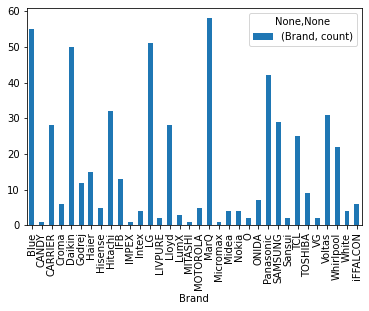

In [34]:
df.groupby('Brand').agg({'Brand':['count']}).plot.bar()

In [70]:
df['BrandCount'] = df['Brand'].value_counts()

In [74]:
df.drop('BrandCount',axis = 1 ,inplace = True)

In [76]:
df.drop('Unnamed: 0',axis = 1 , inplace = True)

In [41]:
count = df.groupby('Brand').agg({'Brand':['count']})

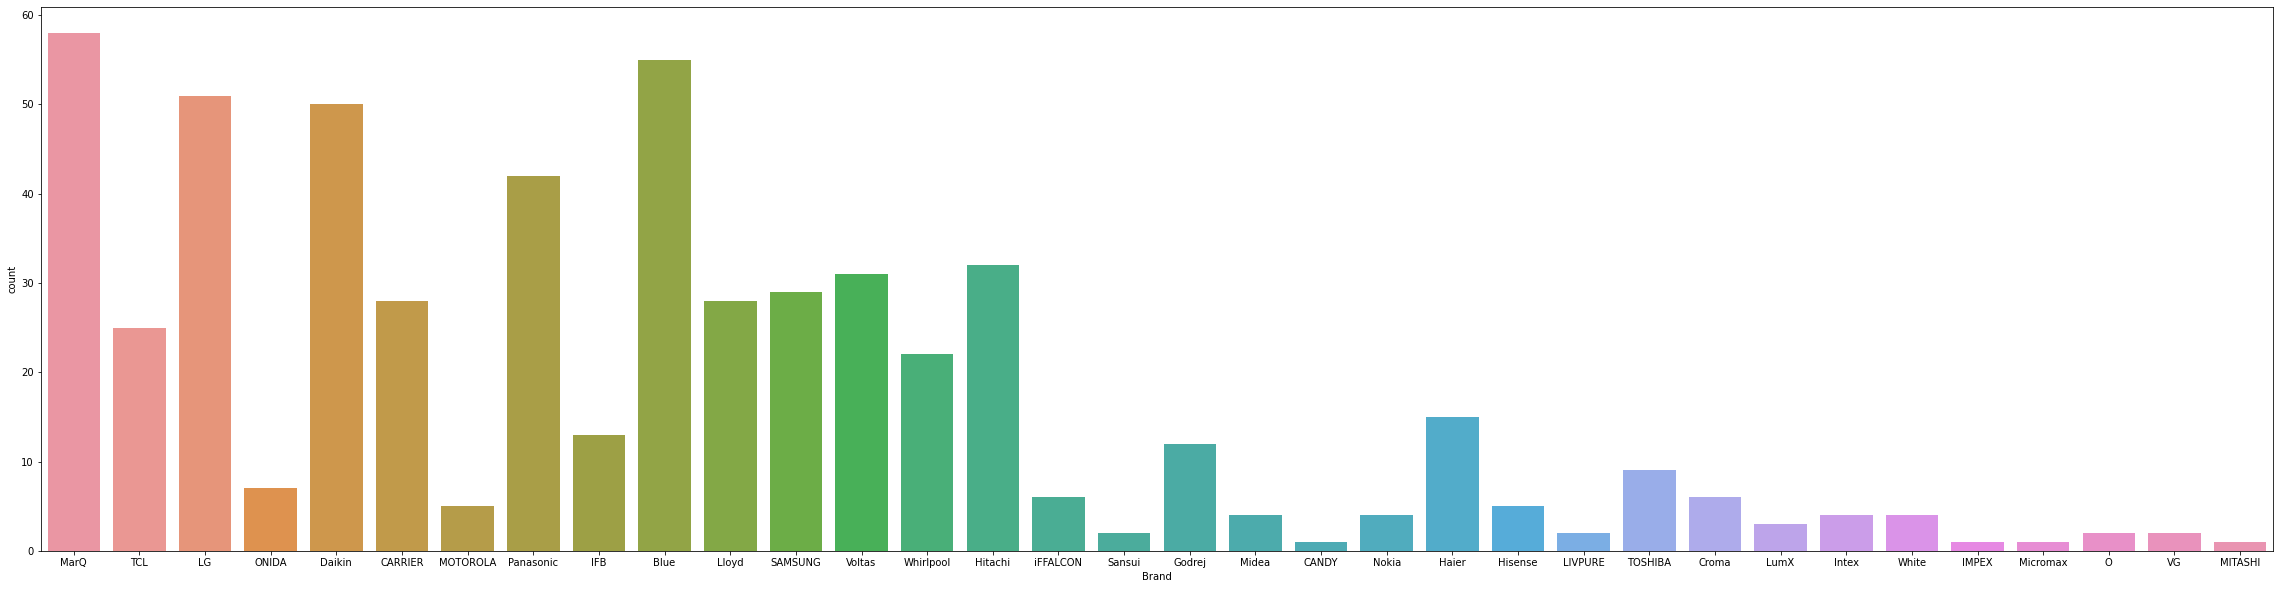

In [47]:
plt.figure(figsize =(40,10))
sns.countplot(x = 'Brand',data = df)
plt.show()

In [22]:
val = df['Brand'].value_counts()[:10]
label = df['Brand'].value_counts()[:10].index

# Blue star and Marq are leading AC Brands

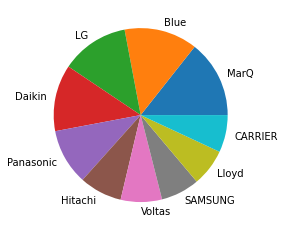

In [23]:
plt.pie(val,labels = label);

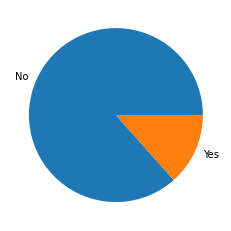

In [19]:
val = df['wifi_facility'].value_counts()
label = df['wifi_facility'].value_counts().index
plt.pie(val,labels = label);

# most of companies are not providing wifi feature

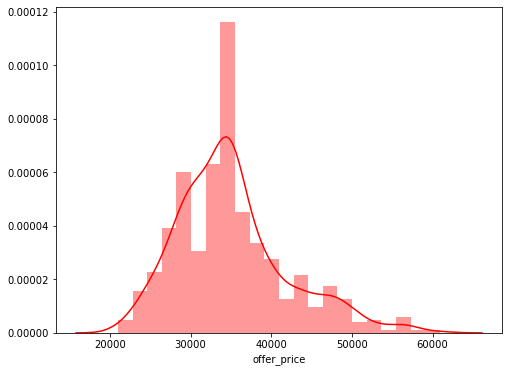

In [86]:
# plot prices in distribution
plt.figure(figsize=(8,6))
sns.distplot(df['offer_price'],color = 'r')
plt.show()
# almost prices are normally distributed with max prices are in range towards leftside of disctribution

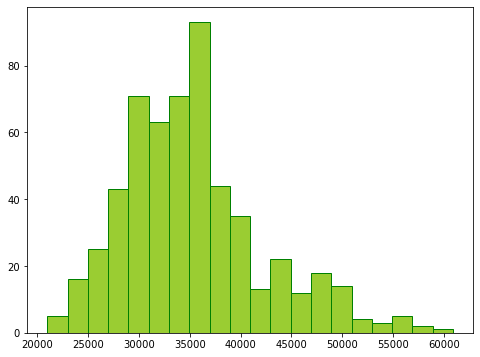

In [84]:
plt.figure(figsize = (8,6))
x = df['offer_price']
plt.hist(x,bins = 20,color = 'yellowgreen',edgecolor = 'g')
plt.show()

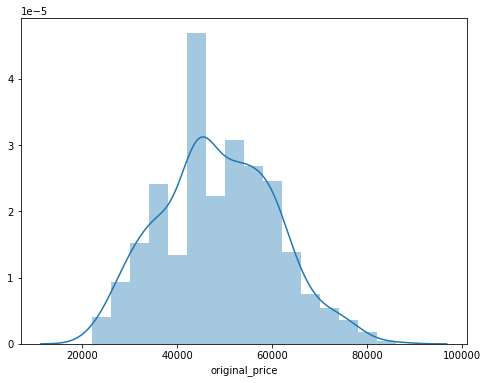

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(df['original_price'],kde = 'False')
plt.show()

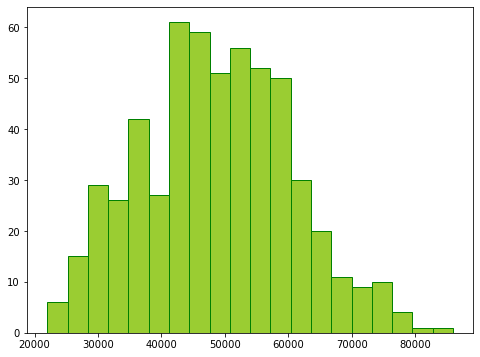

In [87]:
plt.figure(figsize = (8,6))
x = df['original_price']
plt.hist(x,bins = 20,color = 'yellowgreen',edgecolor = 'g')
plt.show()

# Bi-Variate Analysis

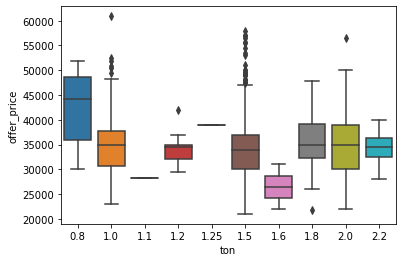

In [55]:
sns.boxplot(x = df['ton'],y = df['offer_price'],data = df)

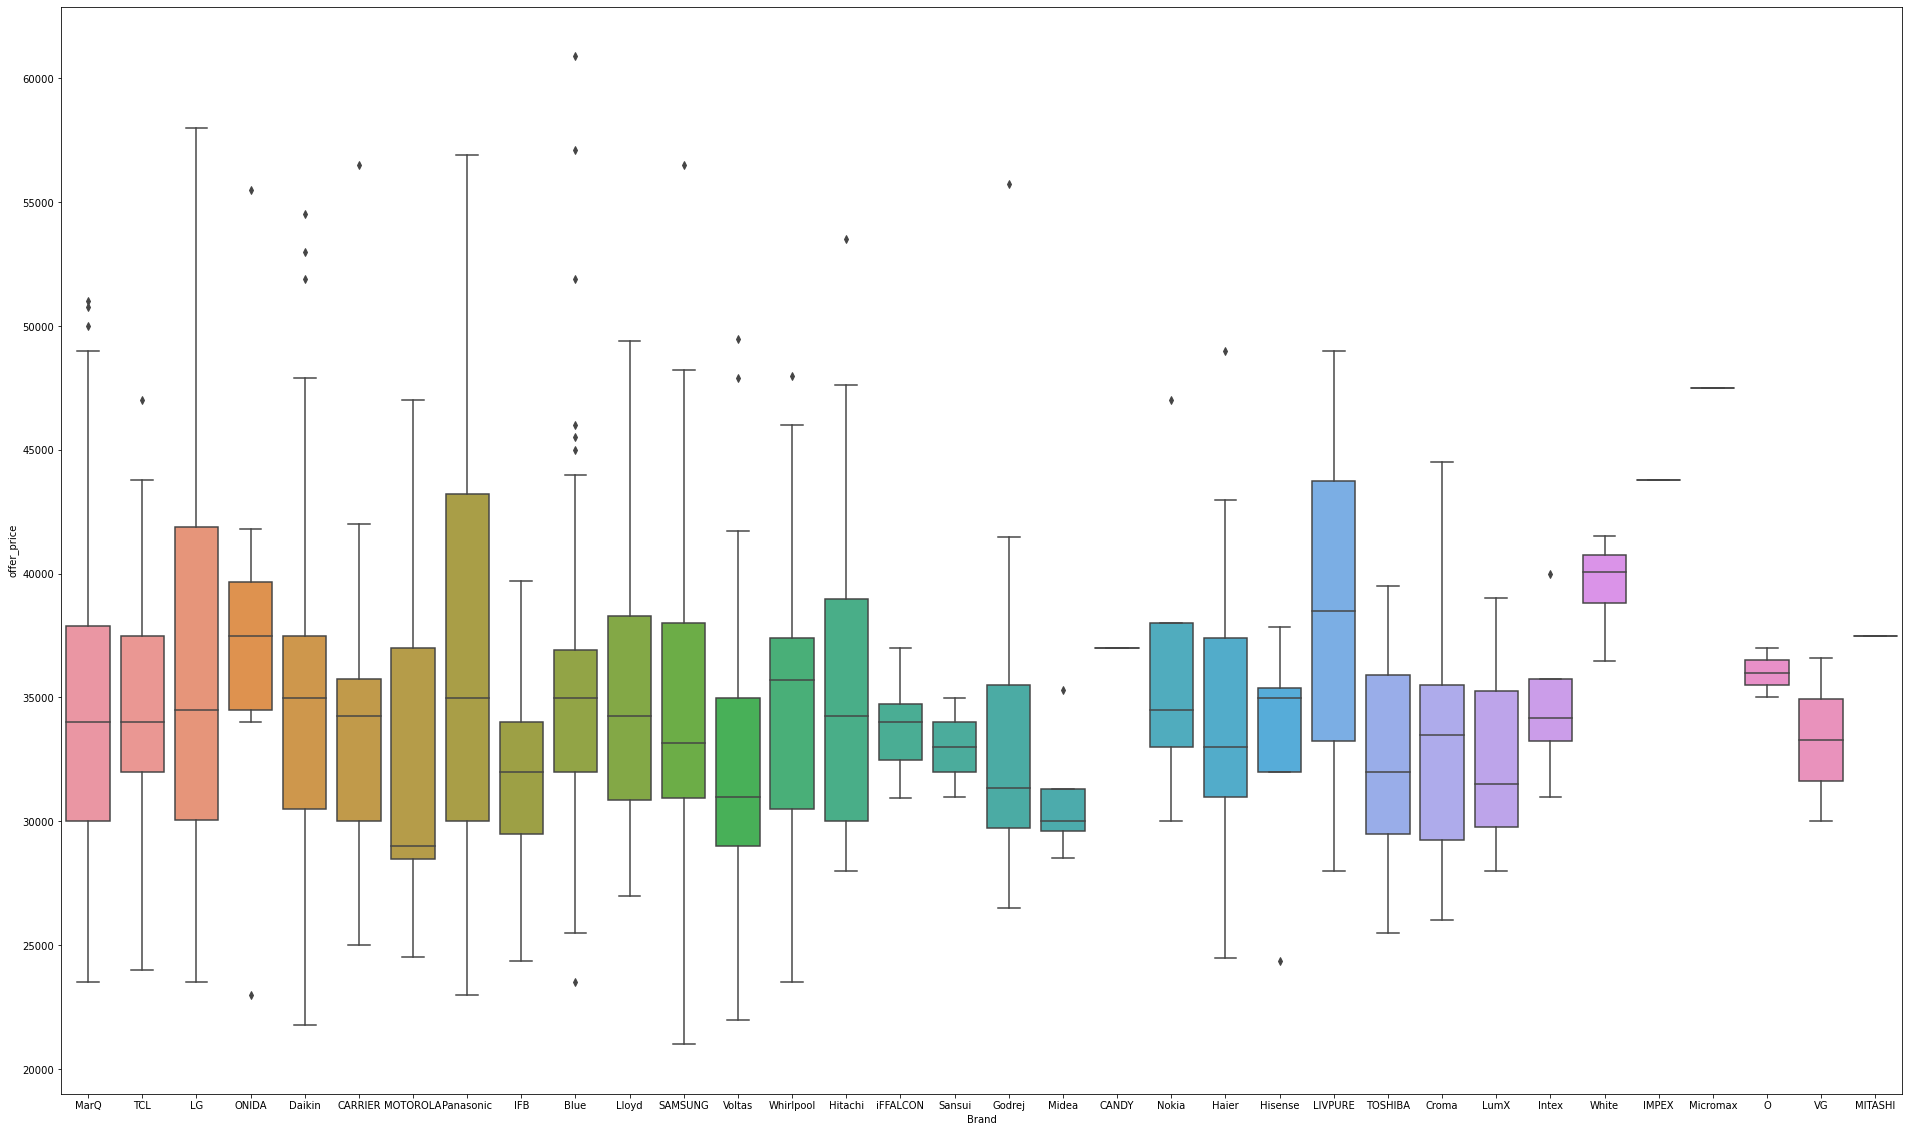

In [94]:
plt.figure(figsize = (33,20))
sns.boxplot(x = df['Brand'],y = df['offer_price'],data = df)
# Highest price offerd in Bluestar
# least price offered in Daikin and Samsung
# LG ,MarQ ,Daikin,Panasonic ,Lloyd Samsung offering AC's in all price ranges
# LG ,MarQ ,Daikin,Panasonic ,Lloyd Samsung offering AC's have prices more than 50,000
# All brands are offering AC with the median price range of 30,000-40,000

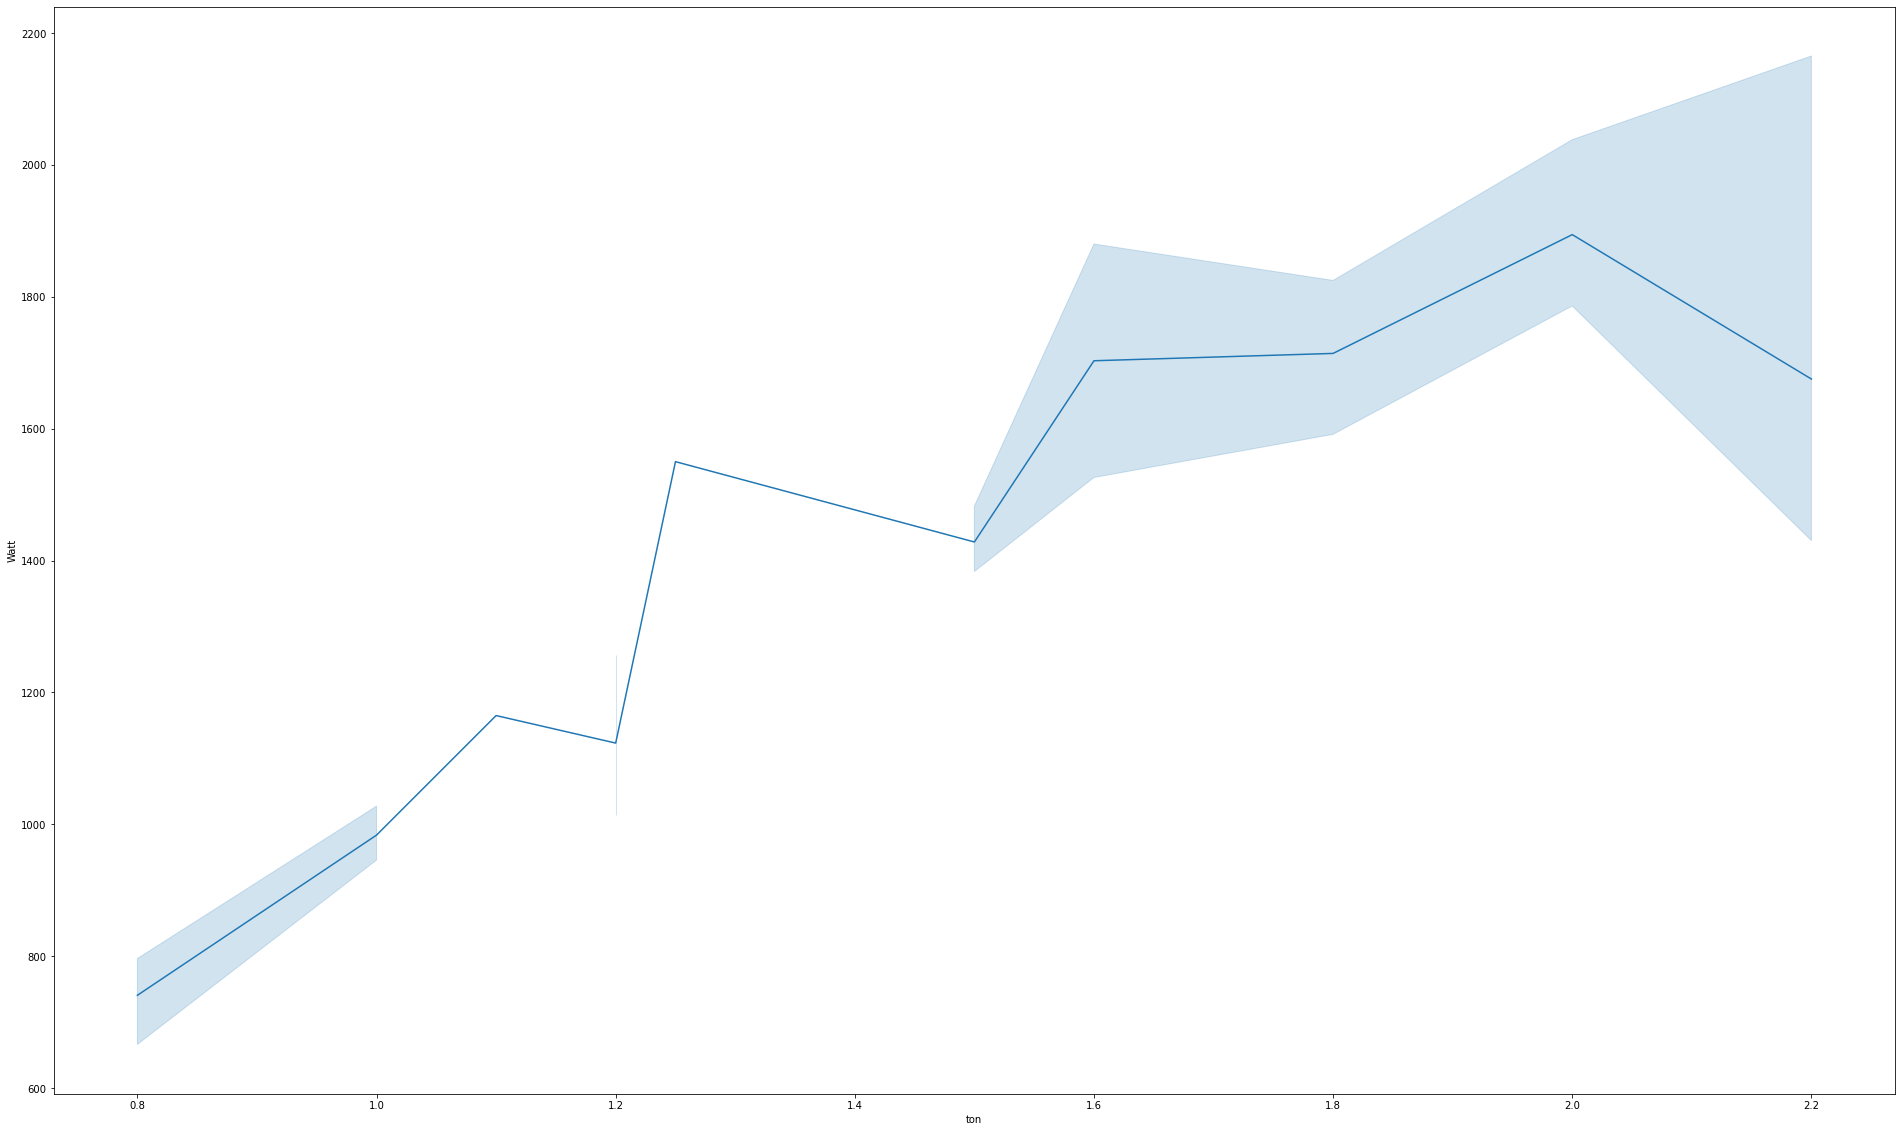

In [108]:
plt.figure(figsize=(33,20))
sns.lineplot(x='ton',y='Watt',data=df)
plt.show()
# watt and ton are linearly distributed
# higher the ton capacity required higher watt consumption

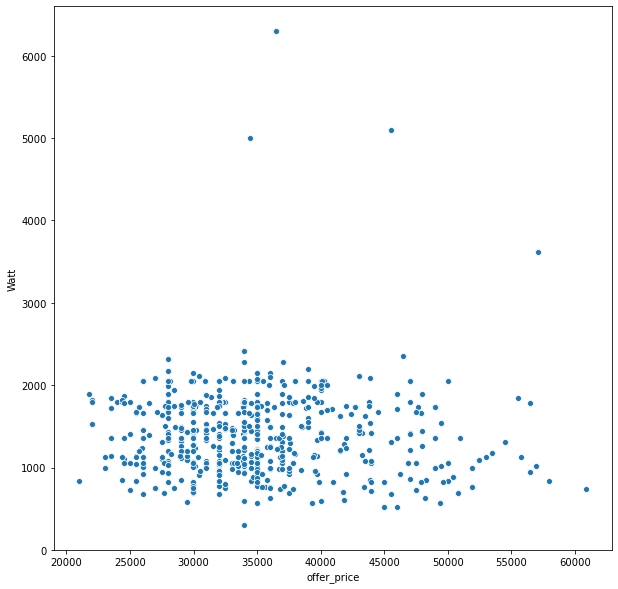

In [100]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='offer_price',y='Watt',data=df)
plt.show()
# data is highly distributed with in power rate 1000-2000 and price rate 25000-35000

In [104]:
df['Watt'].min()

300.0

In [105]:
df['Watt'].max()

6300.0

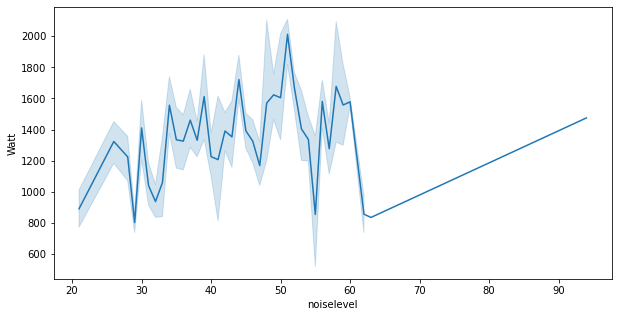

In [115]:
plt.figure(figsize=(10,5))
sns.lineplot(x='noiselevel',y='Watt',data=df)
plt.show()

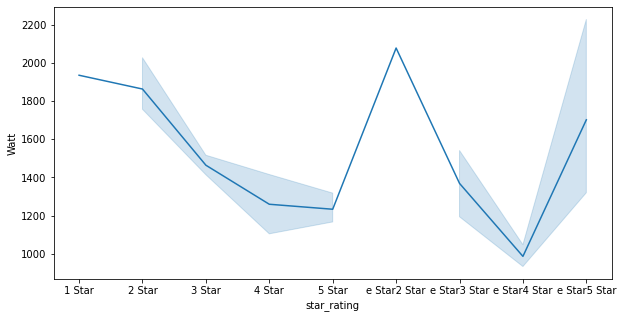

In [123]:
plt.figure(figsize=(10,5))
sns.lineplot(x='star_rating',y='Watt',data=df)
plt.show()
# if star_rating is high powerconsumption is low 
# Inversly distributed graph

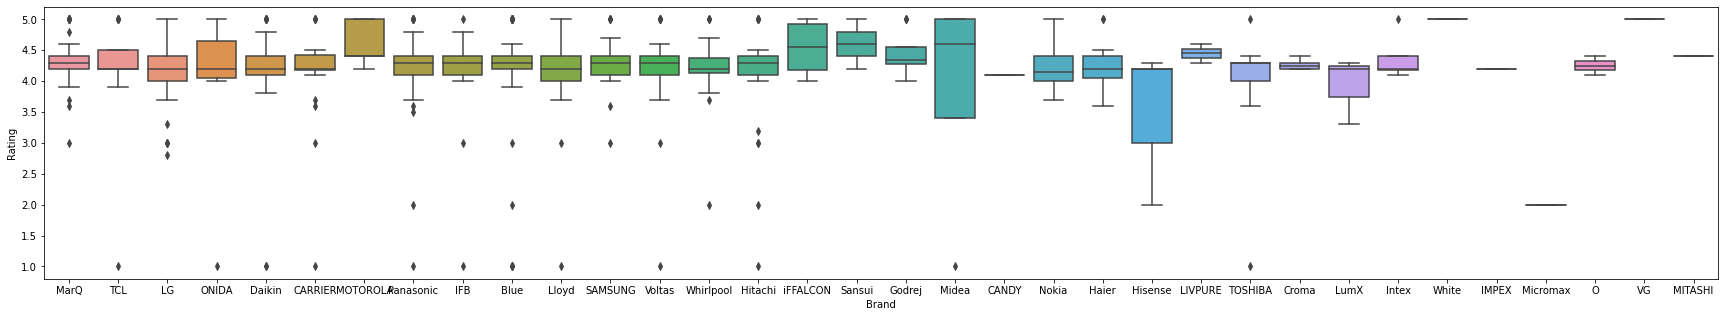

In [136]:
plt.figure(figsize=(30,5))
sns.boxplot(x='Brand',y='Rating',data=df)
plt.show()
# Brands Marq , LG have highest least rating 
# average ratings for all brands is in the range of 4-4.5

# Multivariate Analysis

In [117]:
df.corr()

,Rating,ton,Watt,offer_price,original_price,noiselevel
Rating,1.000000,-0.030009,-0.079642,0.054127,0.015469,0.007013
ton,-0.030009,1.000000,0.559310,-0.042249,0.008025,0.244187
Watt,-0.079642,0.559310,1.000000,-0.030872,-0.011793,0.217461
offer_price,0.054127,-0.042249,-0.030872,1.000000,0.665831,-0.045557
original_price,0.015469,0.008025,-0.011793,0.665831,1.000000,-0.014315
noiselevel,0.007013,0.244187,0.217461,-0.045557,-0.014315,1.000000


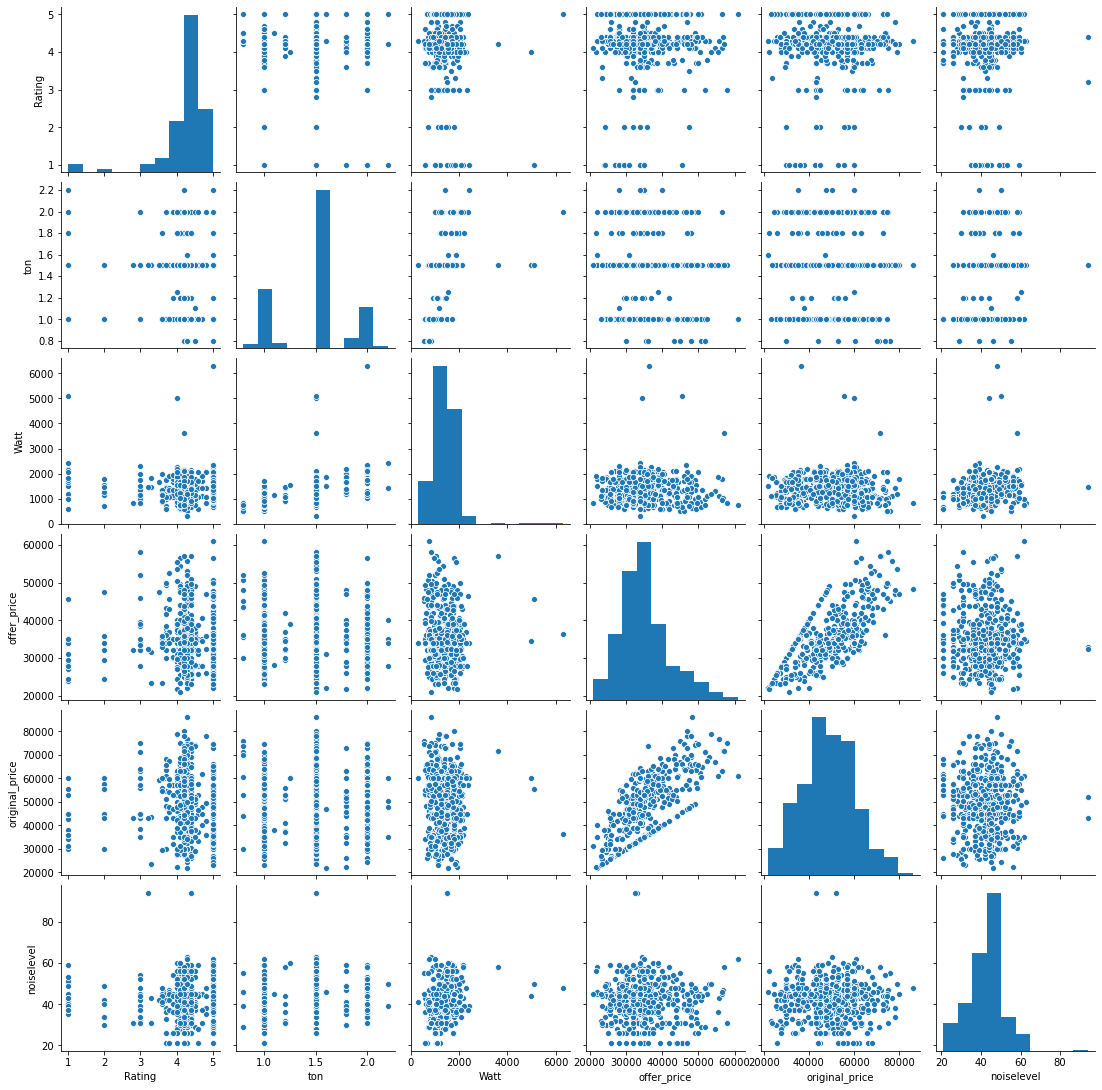

In [121]:
sns.pairplot(data = df)